<img src='https://repository-images.githubusercontent.com/121802384/c355bb80-7d42-11e9-9e0e-4729609f9fbc' alt='WRF-Hydro Logo' width="15%"/>

# Lesson 5 - Land surface experiments

## Overview
In [Lesson 4](Lesson-4-run-options.ipynb) we experimented with different initial and boundary conditions (precipitation). 

In this lesson, we experiment with parameter adjustments to evaluate impacts on streamflow.

**NOTE: If you have not completed Lessons 1 through 4, please stop and do so now.**

### Compiling WRF-Hydro
Below are the commands to compile WRF-Hydro. We are doing a quick short-cut to edit the setEnvar.sh to make sure HYDRO_D and SPATIAL_SOIL are both active. See [Lesson 1](Lesson-1-compile.ipynb) if you have any questions on these settings.

**NOTE: You only need to do these steps if you do not already have a compiled binary. If you do, you can skip the compile steps.**

In [2]:
%%bash
# Change to the trunk/NDHMS directory and configure for gfort
cd ~/wrf-hydro-training/wrf_hydro_nwm_public/
mkdir -p build
cd build
cmake .. -DHYDRO_D=1 -DSPATIAL_SOIL=1

# Compile the code
make -j2 &> compile.log
# make symlink from wrf_hydro to wrf_hydro.exe, this has been done in the main repo
cd Run;  ln -sf wrf_hydro.exe wrf_hydro; ln -sf wrf_hydro_NoahMP.exe wrf_hydroMP; cd ..

# Check to make sure it completed successfully and confirm the correct compile-time options were set.
tail -13 ~/wrf-hydro-training/wrf_hydro_nwm_public/build/compile.log

-- The Fortran compiler identification is GNU 13.3.0
-- The C compiler identification is GNU 13.3.0
-- Detecting Fortran compiler ABI info
-- Detecting Fortran compiler ABI info - done
-- Check for working Fortran compiler: /usr/bin/f95 - skipped
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Found MPI_C: /usr/lib/x86_64-linux-gnu/openmpi/lib/libmpi.so (found version "3.1") 
-- Found MPI_Fortran: /usr/lib/x86_64-linux-gnu/libmpi_usempif08.so (found version "3.1") 
-- Found MPI: TRUE (found version "3.1")  
-- Found NetCDF: /usr/lib/x86_64-linux-gnu/libnetcdff.so;/usr/lib/x86_64-linux-gnu/libnetcdf.so;-L/usr/lib/x86_64-linux-gnu -L/usr/lib/x86_64-linux-gnu/hdf5/serial -lnetcdf  


-- NetCDF Include Dir(s): /usr/include /usr/include
-- Setting LSM to: NoahMP
-- Start of WRF-Hydro Env VARIABLES
WRF_HYDRO = 1
HYDRO_D = 1
WRF_HYDRO_RAPID = 0
SPATIAL_SOIL = 1
WRFIO_NCD_LARGE_FILE_SUPPORT = 0
NCEP_WCOSS = 0
NWM_META = 0
WRF_HYDRO_NUDGING = 0
OUTPUT_CHAN_CONN = 0
PRECIP_DOUBLE = 0
WRF_HYDRO_NUOPC = 0
-- Using gfortran
-- CMAKE_Fortran_COMPILER full path: /usr/bin/f95
-- Building NoahMP LSM


-- Configuring done (1.9s)
-- Generating done (0.1s)
-- Build files have been written to: /home/docker/wrf-hydro-training/wrf_hydro_nwm_public/build
[ 91%] Built target hydro_routing
[ 92%] Building Fortran object src/HYDRO_drv/CMakeFiles/hydro_driver.dir/module_HYDRO_drv.F90.o
[ 93%] Linking Fortran static library ../../lib/libhydro_driver.a
[ 93%] Built target hydro_driver
[ 94%] Building Fortran object src/CPL/NoahMP_cpl/CMakeFiles/hydro_noahmp_cpl.dir/module_hrldas_HYDRO.F.o
[ 95%] Building Fortran object src/CPL/NoahMP_cpl/CMakeFiles/hydro_noahmp_cpl.dir/hrldas_drv_HYDRO.F.o
[ 96%] Linking Fortran static library ../../../lib/libhydro_noahmp_cpl.a
[ 96%] Built target hydro_noahmp_cpl
[ 97%] Building Fortran object src/CMakeFiles/wrfhydro.exe.dir/Land_models/NoahMP/IO_code/module_hrldas_netcdf_io.F.o
[ 98%] Building Fortran object src/CMakeFiles/wrfhydro.exe.dir/Land_models/NoahMP/IO_code/module_NoahMP_hrldas_driver.F.o
[ 99%] Building Fortran object src/CMakeFiles/wrfhydro.exe.dir/

LES
WRF_HYDRO = 1
HYDRO_D = 1
WRF_HYDRO_RAPID = 0
SPATIAL_SOIL = 1[

0m
WRFIO_NCD_LARGE_FILE_SUPPORT = 0


NCEP_WCOSS = 0
NWM_META = 0
WRF_HYDRO_NUDGING = 0
OUTPUT_CHAN_CONN = 0


PRECIP_DOUBLE = 0
WRF_HYDRO_NUOPC = 0

-- Using gfortran
-- CMAKE_Fortran_COMPILER full path: /usr/bin/f95


-- Building NoahMP LSM


-- Configuring done (0.9s)


-- Generating done (0.1s)


-- Build files have been written to: /home/docker/wrf-hydro-training/wrf_hydro_nwm_public/build


[ 91%] Built target hydro_routing
[ 92%] Building Fortran object src/HYDRO_drv/CMakeFiles/hydro

_driver.dir/module_HYDRO_drv.F90.o
[ 93%] Linking Fortran static library ../../lib/libh

ydro_driver.a
[ 93%] Built target hydro_driver
[ 94%] Building Fortran object src/CPL/NoahM

P_cpl/CMakeFiles/hydro_noahmp_cpl.dir/module_hrldas_HYDRO.F.o
[ 95%] Building Fortran objec

t src/CPL/NoahMP_cpl/CMakeFiles/hydro_noahmp_cpl.dir/hrldas_drv_HYDRO.F.o
[ 96%] Linkin

g Fortran static library ../../../lib/libhydro_noahmp_cpl.a
[ 96%] Built target hydro_noahmp_cpl


[ 97%] Building Fortran object src/CMakeFiles/wrfhydro.exe.dir/Land_models/NoahMP/IO_code/modu

le_hrldas_netcdf_io.F.o
[ 98%] Building Fortran object src/CMakeFiles/wrfhydro.exe.dir/Land

_models/NoahMP/IO_code/module_NoahMP_hrldas_driver.F.o
[ 99%] Building Fortran object src/C

MakeFiles/wrfhydro.exe.dir/Land_models/NoahMP/IO_code/main_hrldas_driver.F.o
[100%] Lin

king Fortran executable wrfhydro.exe
[100%] Built target wrfhydro.exe


## Experiment with Modified Parameters
There are a number of key parameters that impact water partitioning, storage, and movement through the model system. We have pulled many of the most important model parameters into NetCDF files to ease parameter display and manipulation, as well as to allow the parameters to vary independently in space. Key terrain routing parameter files include:

| Filename | Description|
| ------------- | ------------- |
| soil_properties.nc | NoahMP soil and vegetation properties (LSM grid) |
| hydro2dtbl.nc | Lateral routing model soil and surface parameters (LSM grid) |
| Fulldom_hires.nc | Lateral routing model high-res parameters (routing grid) |
| GWBUCKPARM.nc | Groundwater baseflow bucket model parameters (groundwater basin objects) |


In this lesson, we will manipulate parameters in the `soil_properties.nc` (*refkdt*, *dksat*, *bexp*) and `Fulldom_hires.nc` (*LKSATFAC*, *RETDEPRTFAC*) files.

### Step 1: Create a new template directory and and run default parameter test case
As in the first section, we will make a new simulation directory and use this as a template for creating multiple new simulation directories.

**Step 1a: Create a new template directory for the parameter experiments.**

In [3]:
%%bash
# Make a new directory for our default baseline simulation
rm -rf ~/wrf-hydro-training/output/lesson5/run_default_template
mkdir -p ~/wrf-hydro-training/output/lesson5/run_default_template

# Copy our model files to the simulation directory
cp ~/wrf-hydro-training/wrf_hydro_nwm_public/build/Run/*.TBL \
  ~/wrf-hydro-training/output/lesson5/run_default_template
cp ~/wrf-hydro-training/wrf_hydro_nwm_public/build/Run/wrf_hydro \
  ~/wrf-hydro-training/output/lesson5/run_default_template

# Create symbolic links to large domain files
cp -as $HOME/wrf-hydro-training/example_case/FORCING \
  ~/wrf-hydro-training/output/lesson5/run_default_template
cp -as $HOME/wrf-hydro-training/example_case/Gridded_no_lakes/RESTART \
  ~/wrf-hydro-training/output/lesson5/run_default_template/RESTART

# Copy the domain/parameter files so we can modify them
cp -r $HOME/wrf-hydro-training/example_case/Gridded_no_lakes/DOMAIN \
  ~/wrf-hydro-training/output/lesson5/run_default_template/DOMAIN

# Copy namelist files
cp ~/wrf-hydro-training/example_case/Gridded_no_lakes/namelist.hrldas \
  ~/wrf-hydro-training/output/lesson5/run_default_template
cp ~/wrf-hydro-training/example_case/Gridded_no_lakes/hydro.namelist \
  ~/wrf-hydro-training/output/lesson5/run_default_template

**Step 1b: Setup and run the default parameter baseline experiment**

We now make a new run directory to run the baseline simulation with default (uncalibrated) parameters.

In [4]:
%%bash
rm -rf ~/wrf-hydro-training/output/lesson5/run_parameter_baseline
cp -r ~/wrf-hydro-training/output/lesson5/run_default_template \
  ~/wrf-hydro-training/output/lesson5/run_parameter_baseline

Launch the baseline run and make sure it completes successfully.

In [5]:
%%bash
cd ~/wrf-hydro-training/output/lesson5/run_parameter_baseline
mpirun -np 2 ./wrf_hydro &> run.log

In [6]:
%%bash
tail -1 ~/wrf-hydro-training/output/lesson5/run_parameter_baseline/diag_hydro.00000

 The model finished successfully.......


**Step 1c: Plot the hydrograph for the baseline (default) run**

We want to take a quick look at the hydrograph for the default parameter run so we see what behavior we might want to adjust.

We will use Python and the `xarray` library to load the data and plot hydrographs. For an intro to these tools, please see [Lesson 3](Lesson-3-visualize.ipynb).

**Load the xarray python package**

In [7]:
# Load the required libraries
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [8]:
xr.set_options(display_style="html")
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [9]:
# Pull the channel output files into xarray objects 
chanobs_control = xr.open_mfdataset('/home/docker/wrf-hydro-training/output/lesson5/run_parameter_baseline/*CHANOBS*',
                            combine='by_coords')
obs = pd.read_csv('/home/docker/wrf-hydro-training/example_case/USGS_obs.csv',dtype=str)
obs['dateTime'] = pd.to_datetime(obs['dateTime'])
obs['streamflow_cms'] = pd.to_numeric(obs['streamflow_cms'])

**Plot the hydrograph for the outlet gage (feature_id = 2, USGS ID 01447720)**

Table 1. USGS Stream Gage IDs and associated WRF-Hydro feature_id indices.

|USGS Gage ID|WRF-Hydro gage feature_id|Gage Information|
|------|:-:|---|
| 01447680 | 1 |https://waterdata.usgs.gov/pa/nwis/uv/?site_no=01447680|
| 01447720 | 2 |https://waterdata.usgs.gov/nwis/nwismap/?site_no=01447720|

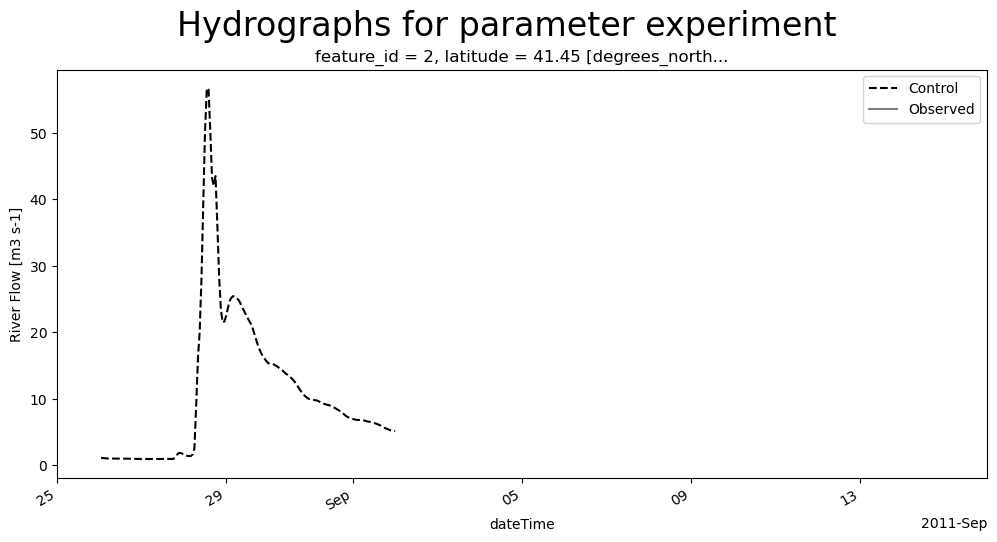

In [29]:
# Plot the baseline hydrograph
fig, axes = plt.subplots(ncols=1,figsize=(12, 6))
plt.suptitle('Hydrographs for parameter experiment',fontsize=24)
chanobs_control.sel(feature_id = 2).streamflow.plot(label='Control',
                                                        color='black',
                                                        linestyle='--')
obs[obs['site_no'] == '01447720'].plot(x='dateTime',
                                       y='streamflow_cms',
                                       ax=axes,
                                       label='Observed',
                                       color='grey')
plt.xlim([dt.date(2011, 8, 25), dt.date(2011, 9, 16)])
plt.legend()
plt.show()

### Step 2: Modify NoahMP parameters using NCO tools

We will create a new simulation directory for our parameter manipulation experiment. 

All of the parameter file edits will be done using NCO. NCO (NetCDF Operators, http://nco.sourceforge.net/) is a set of useful utilities to manipulate NetCDF files.

**Step 2a: Setup the parameter experiment run directory**

First make a new run directory where we can start modifying parameter files.

In [28]:
%%bash
rm -rf ~/wrf-hydro-training/output/lesson5/run_parameter_mods
cp -r ~/wrf-hydro-training/output/lesson5/run_default_template \
  ~/wrf-hydro-training/output/lesson5/run_parameter_mods

**Step 2b: Use the NCO command `ncap2` to modify the *refkdt* parameter values in the `soil_properties.nc` file.**

**REFKDT**

An important Noah/NoahMP parameter that we commonly adjust when activating terrain routing is *refkdt*. *Refkdt* controls how easily precipitation reaching the surface infiltrates into the soil column vs. stays on the surface where it can become surface runoff. Higher values of *refkdt* lead to more infiltration and less surface (fast) runoff. This tunable parameter can be set to a relatively high value (e.g., 3.0) suitable for running the column land surface model only. When activating terrain routing to explicitly model these processes, we often reduce this parameter. In addition, if you are calling the land surface model on a small timestep (e.g., seconds to minutes), you may want to reduce this parameter to compensate for the more frequent calls to the vertical infiltration scheme. 

We will decrease the *refkdt* value, but first we check the current parameter values using `ncdump`.

In [12]:
%%bash

ncdump -v refkdt ~/wrf-hydro-training/output/lesson5/run_parameter_mods/DOMAIN/soil_properties.nc \
  | tail -n 10

  3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
  3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
  3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
  3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
  3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
  3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
  3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
  3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
  3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3 ;
}


, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
  3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
  3, 3, 3, 3

, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
  3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
  3, 3, 3, 3, 3, 3

, 3, 3, 3, 3, 3, 3, 3, 3, 3,
  3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
  3, 3, 3, 3, 3, 3, 3, 3

, 3, 3, 3, 3, 3, 3, 3 ;
}


The default value for *refkdt* is a global 3.0. We modify the parameter values using Python to a lower value (1.0).

In [13]:
%%bash

ncap2 -O -s "refkdt=float(refkdt*0.0+1.0)" \
~/wrf-hydro-training/output/lesson5/run_parameter_mods/DOMAIN/soil_properties.nc \
~/wrf-hydro-training/output/lesson5/run_parameter_mods/DOMAIN/soil_properties.nc

We check to make sure the changes are as expected.

In [14]:
%%bash

ncdump -v refkdt ~/wrf-hydro-training/output/lesson5/run_parameter_mods/DOMAIN/soil_properties.nc \
| tail -n 10

  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ;
}


, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 1, 1, 1

, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 1, 1, 1, 1, 1

, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 1, 1, 1, 1, 1, 1, 1

, 1, 1, 1, 1, 1, 1, 1 ;
}


**Step 2c: Use the NCO command `ncap2` to modify the *dksat* parameter values in the `soil_properties.nc` file.**

**DKSAT and BEXP**

As with most physically-based hydrological models, the soil saturated hydraulic conductivity (*dksat*) controls the speed at which water moves through the subsurface. This is a sensitive parameter in the model, and while easy to measure at the point scale, *dksat* is tricky to estimate at the scale of kilometers. Initial values are estimated based on soil texture class, but reported ranges have large (many orders of magnitude) variability. This is a common calibration parameter, along with the related *bexp* parameter that controls how actual conductivity is scaled from saturated conductivity based on soil water content.

Here we will use the NCO command `ncap2` to increase the *dksat* value by a factor of 8 and *bexp* by a factor of 1.5.

First, we check the current parameter values using `ncdump`.

In [15]:
%%bash

ncdump -v dksat ~/wrf-hydro-training/output/lesson5/run_parameter_mods/DOMAIN/soil_properties.nc \
| tail -n 10

  2.81e-06, 2.81e-06, 2.81e-06, 5.23e-06, 5.23e-06, 5.23e-06, 5.23e-06, 
    5.23e-06, 5.23e-06, 5.23e-06, 5.23e-06, 5.23e-06, 5.23e-06, 5.23e-06, 
    5.23e-06,
  2.81e-06, 2.81e-06, 2.81e-06, 5.23e-06, 5.23e-06, 5.23e-06, 5.23e-06, 
    5.23e-06, 5.23e-06, 5.23e-06, 5.23e-06, 5.23e-06, 5.23e-06, 5.23e-06, 
    5.23e-06,
  5.23e-06, 2.81e-06, 2.81e-06, 2.81e-06, 2.81e-06, 5.23e-06, 5.23e-06, 
    5.23e-06, 5.23e-06, 5.23e-06, 5.23e-06, 5.23e-06, 5.23e-06, 5.23e-06, 
    5.23e-06 ;
}


3e-06, 5.23e-06, 5.23e-06, 5.23e-06, 5.23e-06, 
    5.23e-06,
  2.81e-06, 2.81e-06, 2.81e-06, 5.23e-

06, 5.23e-06, 5.23e-06, 5.23e-06, 
    5.23e-06, 5.23e-06, 5.23e-06, 5.23e-06, 5.23e-06, 5.23e-06, 5

.23e-06, 
    5.23e-06,
  5.23e-06, 2.81e-06, 2.81e-06, 2.81e-06, 2.81e-06, 5.23e-06, 5.23e-06, 
   

 5.23e-06, 5.23e-06, 5.23e-06, 5.23e-06, 5.23e-06, 5.23e-06, 5.23e-06, 
    5.23e-06 ;
}


Note that this parameter's initial values vary in space based on soil texture class. We modify the parameter values using Python to increase by a factor of 8. This maintains the spatial distribution, but encourage faster soil water movement overall.

In [16]:
%%bash

ncap2 -O -s "dksat=float(dksat*8.0)" \
~/wrf-hydro-training/output/lesson5/run_parameter_mods/DOMAIN/soil_properties.nc \
~/wrf-hydro-training/output/lesson5/run_parameter_mods/DOMAIN/soil_properties.nc
ncdump -v dksat ~/wrf-hydro-training/output/lesson5/run_parameter_mods/DOMAIN/soil_properties.nc \
| tail -n 10

  2.248e-05, 2.248e-05, 2.248e-05, 4.184e-05, 4.184e-05, 4.184e-05, 
    4.184e-05, 4.184e-05, 4.184e-05, 4.184e-05, 4.184e-05, 4.184e-05, 
    4.184e-05, 4.184e-05, 4.184e-05,
  2.248e-05, 2.248e-05, 2.248e-05, 4.184e-05, 4.184e-05, 4.184e-05, 
    4.184e-05, 4.184e-05, 4.184e-05, 4.184e-05, 4.184e-05, 4.184e-05, 
    4.184e-05, 4.184e-05, 4.184e-05,
  4.184e-05, 2.248e-05, 2.248e-05, 2.248e-05, 2.248e-05, 4.184e-05, 
    4.184e-05, 4.184e-05, 4.184e-05, 4.184e-05, 4.184e-05, 4.184e-05, 
    4.184e-05, 4.184e-05, 4.184e-05 ;
}


Use `ncdump` to check the starting values of *bexp*. Note that these also vary spatially by soil type. We will increase these values by a factor of 1.5.

In [17]:
%%bash

ncdump -v bexp ~/wrf-hydro-training/output/lesson5/run_parameter_mods/DOMAIN/soil_properties.nc \
| tail -n 10

    4.74, 4.74, 4.74,
  4.74, 5.33, 5.33, 4.74, 4.74, 4.74, 4.74, 4.74, 4.74, 4.74, 4.74, 4.74, 
    4.74, 4.74, 4.74,
  5.33, 5.33, 5.33, 4.74, 4.74, 4.74, 4.74, 4.74, 4.74, 4.74, 4.74, 4.74, 
    4.74, 4.74, 4.74,
  5.33, 5.33, 5.33, 4.74, 4.74, 4.74, 4.74, 4.74, 4.74, 4.74, 4.74, 4.74, 
    4.74, 4.74, 4.74,
  4.74, 5.33, 5.33, 5.33, 5.33, 4.74, 4.74, 4.74, 4.74, 4.74, 4.74, 4.74, 
    4.74, 4.74, 4.74 ;
}


 4.74, 4.74, 4.74,
  5.33, 5.33, 5.33, 4.74, 4.74, 4.74, 4.74, 4.74, 4.74, 4.74, 4.74, 4.74, 
    4.

74, 4.74, 4.74,
  5.33, 5.33, 5.33, 4.74, 4.74, 4.74, 4.74, 4.74, 4.74, 4.74, 4.74, 4.74, 
    4.74,

 4.74, 4.74,
  4.74, 5.33, 5.33, 5.33, 5.33, 4.74, 4.74, 4.74, 4.74, 4.74, 4.74, 4.74, 
    4.74, 4.

74, 4.74 ;
}


In [18]:
%%bash

ncap2 -O -s "bexp=float(bexp*1.5)" \
~/wrf-hydro-training/output/lesson5/run_parameter_mods/DOMAIN/soil_properties.nc \
~/wrf-hydro-training/output/lesson5/run_parameter_mods/DOMAIN/soil_properties.nc
ncdump -v bexp ~/wrf-hydro-training/output/lesson5/run_parameter_mods/DOMAIN/soil_properties.nc \
| tail -n 10

    7.11, 7.11, 7.11,
  7.11, 7.995, 7.995, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 
    7.11, 7.11, 7.11,
  7.995, 7.995, 7.995, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 
    7.11, 7.11, 7.11,
  7.995, 7.995, 7.995, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 
    7.11, 7.11, 7.11,
  7.11, 7.995, 7.995, 7.995, 7.995, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 
    7.11, 7.11, 7.11 ;
}


### Step 3: Modify terrain routing parameters using NCO tools

Now we will turn our attention to the parameters that affect lateral routing behavior.

**Step 3a: Use the NCO command `ncap2` to modify the *LKSATFAC* and *RETDEPRTFAC* parameter values in the `Fulldom_hires.nc` file**

**LKSATFAC**

The Fulldom_hires.nc file contains two parameters that are also important for lateral flow processes. The *LKSATFAC* parameter is a multiplier on the prescribed lateral saturated hydraulic conductivity values specified in `hydro2dtbl.nc`. By default, lateral conductivity in `hydro2dtbl.nc` matches vertical conductivity specified in `soil_properties.nc`. However, in the real world we frequently see many orders of magnitude higher conductivities in the lateral direction vs. the vertical direction (due to soil stratigraphy, preferential flowpaths caused by roots and animals, etc.). *LKSATFAC* is an easy way to adjust this anisotropy, and by default it is set to 1,000.

We will use the NCO command `ncap2` to increase the *LKSATFAC* value to 16,000 (this encompasses the original dksat multipler of 8 and an additional anisotropy factor of 2,000).

First, we check the current parameter values.

In [19]:
%%bash

ncdump -v LKSATFAC ~/wrf-hydro-training/output/lesson5/run_parameter_mods/DOMAIN/Fulldom_hires.nc \
| tail -n 10

    1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 
    1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 
    1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 
    1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
  1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 
    1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 
    1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 
    1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 
    1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000 ;
}


000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 
    1000, 1000, 1000, 1000, 1000, 1000, 1000, 

1000, 1000, 1000, 1000, 1000, 
    1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,

 1000,
  1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 
    1000, 1000, 10

00, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 
    1000, 1000, 1000, 1000, 1000, 1000, 1

000, 1000, 1000, 1000, 1000, 1000, 
    1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 

1000, 1000, 
    1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000 ;
}


Then, we modify the parameter values and confirm our changes.

In [20]:
%%bash

ncap2 -O -s "LKSATFAC=float(LKSATFAC*0.0+16000.0)" \
~/wrf-hydro-training/output/lesson5/run_parameter_mods/DOMAIN/Fulldom_hires.nc \
~/wrf-hydro-training/output/lesson5/run_parameter_mods/DOMAIN/Fulldom_hires.nc
ncdump -v LKSATFAC ~/wrf-hydro-training/output/lesson5/run_parameter_mods/DOMAIN/Fulldom_hires.nc \
| tail -n 10

    16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 
    16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 
    16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000,
  16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 
    16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 
    16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 
    16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 
    16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 
    16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000 ;
}


**RETDEPRTFAC**

The *RETDEPRTFAC* parameter is a multiplier on the maximum retention depth. Ponded water on the surface above this retention depth threshold can be moved around the landscape via overland flow. The default value in the code is quite small (~0.001mm, though variable by terrain slope) to allow almost all ponded water to be available for routing. However, in many regions landscape features like wetlands, small detention ponds, and heavy vegetation litter/debris can trap water on the land surface. Increasing the *RETDEPRTFAC* multiplier will hold more ponded water on the surface before it becomes runoff.

We will use the NCO command `ncap2` to increase the *RETDEPRTFAC* value to 10000 (max of 10mm).

First, we check the current parameter values.

In [24]:
%%bash

ncdump -v RETDEPRTFAC ~/wrf-hydro-training/output/lesson5/run_parameter_mods/DOMAIN/Fulldom_hires.nc \
| tail -n 10

  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
    1, 1, 1, 1, 1, 1, 

1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 1, 

1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
    1, 1, 1, 1, 1, 1, 1, 1, 1,

 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 1, 1, 1, 1,

 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ;
}


Then, we modify the parameter values using Python and confirm our changes.

In [21]:
%%bash

ncap2 -O -s "RETDEPRTFAC=float(RETDEPRTFAC*0.0+10000.0)" \
~/wrf-hydro-training/output/lesson5/run_parameter_mods/DOMAIN/Fulldom_hires.nc \
~/wrf-hydro-training/output/lesson5/run_parameter_mods/DOMAIN/Fulldom_hires.nc
ncdump -v RETDEPRTFAC ~/wrf-hydro-training/output/lesson5/run_parameter_mods/DOMAIN/Fulldom_hires.nc \
| tail -n 10

    10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 
    10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 
    10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
  10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 
    10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 
    10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 
    10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 
    10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 
    10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000 ;
}


**Step 3b: Run the simulation**

Now we are ready to run a simulation with our new modified parameters.

In [22]:
%%bash
cd ~/wrf-hydro-training/output/lesson5/run_parameter_mods
mpirun -np 2 ./wrf_hydro &> run.log

Check to make sure your run completed successfully.

In [23]:
%%bash

tail -1 ~/wrf-hydro-training/output/lesson5/run_parameter_mods/diag_hydro.00000

 The model finished successfully.......


### Results
We will now look at the differences in streamflow between our baseline run with default parmeters and the simulation using our new modified parameters.

We will use Python and the `xarray` library to load the data and plot hydrographs. For an intro to these tools, please see [Lesson 3](Lesson-3-visualize.ipynb).

**Load the CHANOBS streamflow datasets**

We are going to use the CHANOBS files because it will limit the number of grid cells to only those which we have specified have a gage.

In [24]:
# Pull the channel output files into xarray objects 
chanobs_param_mods = xr.open_mfdataset('/home/docker/wrf-hydro-training/output/lesson5/run_parameter_mods/*CHANOBS*',
                                       combine='by_coords')

**Plot the hydrographs**

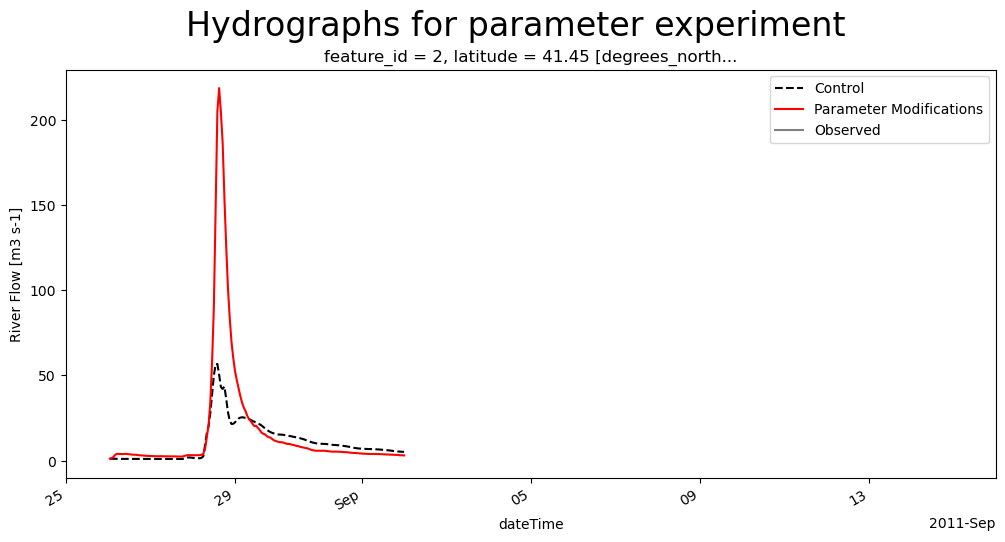

In [25]:
fig, axes = plt.subplots(ncols=1,figsize=(12, 6))
plt.suptitle('Hydrographs for parameter experiment',fontsize=24)
chanobs_control.sel(feature_id = 2).streamflow.plot(label='Control',
                                                    color='black',
                                                    linestyle='--')
chanobs_param_mods.sel(feature_id = 2).streamflow.plot(label='Parameter Modifications',
                                                       color='red',
                                                       linestyle='-')
obs[obs['site_no'] == '01447720'].plot(x='dateTime',
                                       y='streamflow_cms',
                                       ax=axes,
                                       label='Observed',
                                       color='grey')
plt.xlim([dt.date(2011, 8, 25), dt.date(2011, 9, 16)])
plt.legend()
plt.show()

We see definite differences between the streamflow responses with and without parameter modifications (red solid and black dashed lines, respectively). The low streamflow bias in the original run (black) is mitigated in the "calibrated" run (red), and we now see a slight high bias. So where did all the new streamflow come from?

**Load the LDASOUT land model output files**

In our simulations, we specified land surface model output (LDASOUT) files once per day. We will read those in using xarray.

In [26]:
ldasout_baseline = xr.open_mfdataset('/home/docker/wrf-hydro-training/output/lesson5/run_parameter_baseline/*.LDASOUT*',
                            combine='by_coords')
ldasout_mods = xr.open_mfdataset('/home/docker/wrf-hydro-training/output/lesson5/run_parameter_mods/*.LDASOUT*',
                            combine='by_coords')

**Plot the mean soil moisture time series**

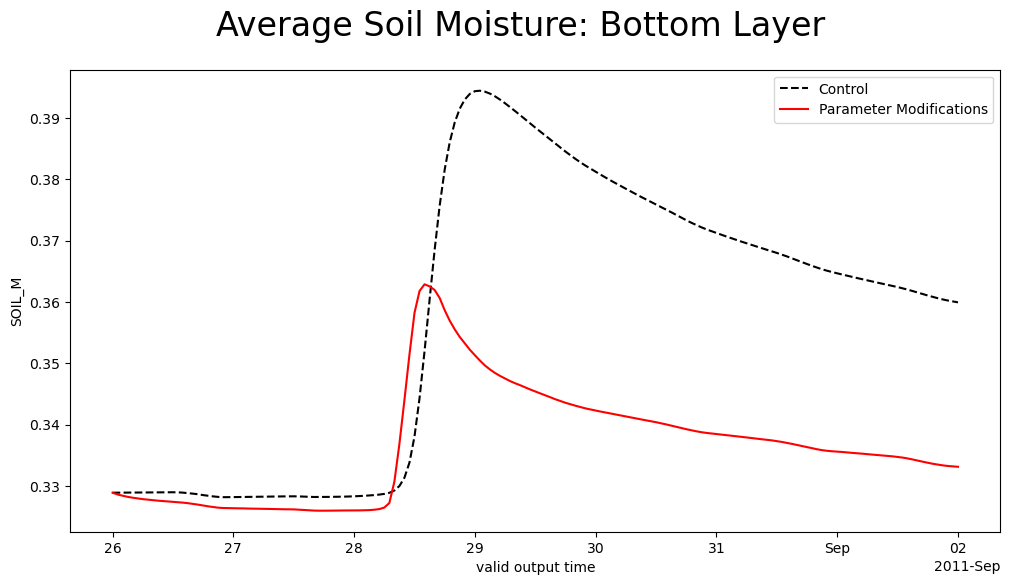

In [27]:
# Calculate the mean bottom-layer soil moisture across the domain
smois_baseline_avg = ldasout_baseline.SOIL_M.sel(soil_layers_stag = 3).mean(dim=('y','x'))
smois_mods_avg = ldasout_mods.SOIL_M.sel(soil_layers_stag = 3).mean(dim=('y','x')) 

# Plot the soil moisture time series
fig, axes = plt.subplots(ncols=1,figsize=(12, 6))
plt.suptitle('Average Soil Moisture: Bottom Layer',fontsize=24)
smois_baseline_avg.plot(label='Control', color='black', linestyle='--')
smois_mods_avg.plot(label='Parameter Modifications', color='red', linestyle='-')
plt.legend()
plt.show()

In the "calibrated" simulation, we are partitoning more water to surface runoff and encouraging faster vertical and lateral soil water drainage. Both parameter modifications result in less water being stored in the soil column, as shown in the soil moisture plot above, and more water going to streamflow.

### Discussion
Our baseline simulation with default parameters had an initial event peak that was far too low in magnitude, too early, and overly flashy, followed by a longer prolonged flow signal well after the event. We reduced *refkdt* to better match our activated terrain physics and encourage more surface runoff. We increased *dksat* and *bexp* (controlling the vertical drainage rate) and *LKSATFAC* (controlling the lateral drainage rate) to add more spread to the flow peak. We increased *RETDEPRTFAC* to hold more ponded water at the surface. Our modified parameter experiment results do better match the gage observations, though we still have some slight timing issues (too early for the first event, too late for the second) and slightly prolonged recessions. Both could likely be mitigated through further parameter modifications.

**IMPORTANT NOTE**: We abbreviated this parameter calibration exercise to fit within a short lesson. In practice, you would want to give the model time to adjust to a new parameter set by running an extended "spin-up" period before the time period you are evaluating. You would also want to expose the model to a wider range of conditions than the short event demostrated here. Model parameters calibrated to a short event may not transfer well to other time periods. Good practice is to calibrate your model to a wide range of conditions to minimize the impacts of forcing, gage, or model physics/parameter uncertainties.

### Other Commonly Calibrated Parameters

**SLOPE**

There are a number of Noah/NoahMP model parameters that affect water partitioning. One important parameter that we commonly adjust is *slope*. Originally estimated based on land surface topography (hence the name *slope*), the *slope* parameter controls how open or closed the bottom boundary of the soil column is. It is a multiplier on the bottom boundary conductivity. Values range from 0 to 1, where 0 is a completely closed bottom boundary and 1 is completely open. Lower *slope* values will keep more water in the soil column, while higher values will allow more water to drain to the channel or to deeper baseflow stores, depending on the selected baseflow physics options.

**SMCMAX, SMCREF, SMCWLT**

Soil water holding capacity is controlled by the porosity (*smcmax*), field capacity (*smcref*), and wilting point (*smcwlt*). These properties are specified by soil texture class, but also vary significantly in space so can be calibrated.


# Next up - Do it yourself!
This concludes Lesson 5. Spend some time creating your own parameter experiments.

The next lesson is [Lesson 6](Lesson-6-lakes.ipynb).

**IT IS BEST TO EITHER SHUTDOWN THIS LESSON OR CLOSE IT BEFORE PROCEEDING TO THE NEXT LESSON TO AVOID POSSIBLY EXCEEDING ALLOCATED MEMORY. Shutdown the lesson be either closing the browser tab for the lesson or selecting `Kernel -> Shut Down Kernel` in JupyterLab.**

© UCAR 2025